In [62]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [63]:
! cp drive/MyDrive/ML/cumulative.csv .

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
dataframe = pd.read_csv('cumulative.csv')

In [112]:
dataframe["koi_disposition"] = dataframe["koi_disposition"].apply(lambda x: -1 if x=='FALSE POSITIVE' else 1)

In [113]:
dataframe["koi_pdisposition"] = dataframe["koi_pdisposition"].apply(lambda x: -1 if x=='FALSE POSITIVE' else 1)
dataframe["koi_pdisposition"].corr(dataframe["koi_score"])

0.973558686543421

In [114]:
for column in dataframe.columns:
  if(dataframe[column].isna().sum() > 1000):
    print(column)
    print(dataframe[column].isna().sum())

kepler_name
7270
koi_score
1510
koi_teq_err1
9564
koi_teq_err2
9564


In [115]:
#Dropping columns
dataframe.drop("kepler_name", inplace=True, axis=1)
dataframe.drop("kepoi_name", inplace=True, axis=1)
dataframe.drop("koi_score", inplace=True, axis=1)
dataframe.drop("koi_teq_err1", inplace=True, axis=1)
dataframe.drop("koi_teq_err2", inplace=True, axis=1)
dataframe.drop("rowid", inplace=True, axis=1)
dataframe.drop("kepid", inplace=True, axis=1)
dataframe.drop("koi_tce_delivname", inplace=True, axis=1)

In [116]:
na_list = dataframe.isnull().sum(axis=1)
index_list = []
for i in range(len(na_list)):
  if(na_list[i] >=10):
    index_list.append(i)
dataframe.drop(index_list,inplace=True)

In [117]:
for column in dataframe.columns:
  print("{} {}".format(dataframe[column].isna().sum(),column),dataframe[column].dtype)

0 koi_disposition int64
0 koi_pdisposition int64
0 koi_fpflag_nt int64
0 koi_fpflag_ss int64
0 koi_fpflag_co int64
0 koi_fpflag_ec int64
0 koi_period float64
0 koi_period_err1 float64
0 koi_period_err2 float64
0 koi_time0bk float64
0 koi_time0bk_err1 float64
0 koi_time0bk_err2 float64
0 koi_impact float64
0 koi_impact_err1 float64
0 koi_impact_err2 float64
0 koi_duration float64
0 koi_duration_err1 float64
0 koi_duration_err2 float64
0 koi_depth float64
0 koi_depth_err1 float64
0 koi_depth_err2 float64
0 koi_prad float64
0 koi_prad_err1 float64
0 koi_prad_err2 float64
0 koi_teq float64
0 koi_insol float64
0 koi_insol_err1 float64
0 koi_insol_err2 float64
0 koi_model_snr float64
255 koi_tce_plnt_num float64
0 koi_steff float64
103 koi_steff_err1 float64
118 koi_steff_err2 float64
0 koi_slogg float64
103 koi_slogg_err1 float64
103 koi_slogg_err2 float64
0 koi_srad float64
103 koi_srad_err1 float64
103 koi_srad_err2 float64
0 ra float64
0 dec float64
1 koi_kepmag float64


In [118]:
for param in dataframe.columns:
  if(dataframe[param].dtype!= "object"):
    reqMean = dataframe[param].mean()
    dataframe[param] = dataframe[param].replace(np.nan, reqMean)
    

In [119]:
df = dataframe
print(dataframe.shape)
print(df.duplicated().sum())

(9110, 42)
0


In [77]:
df.columns

Index(['index', 'koi_disposition', 'koi_pdisposition', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [78]:
df.head()

,index,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,CONFIRMED,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,CONFIRMED,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,FALSE POSITIVE,-1,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,3,FALSE POSITIVE,-1,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,4,CONFIRMED,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [105]:
print((df['koi_disposition'].value_counts()/df['koi_disposition'].count())*100)

FALSE POSITIVE    66.969304
CONFIRMED         33.030696
Name: koi_disposition, dtype: float64


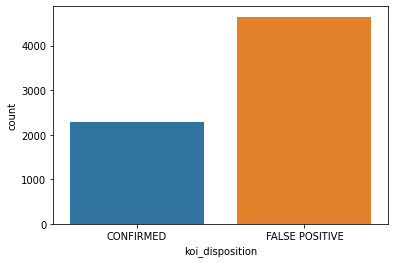

In [80]:
#unbalanced dataset
sns.countplot(x='koi_disposition', data=df)
plt.show()

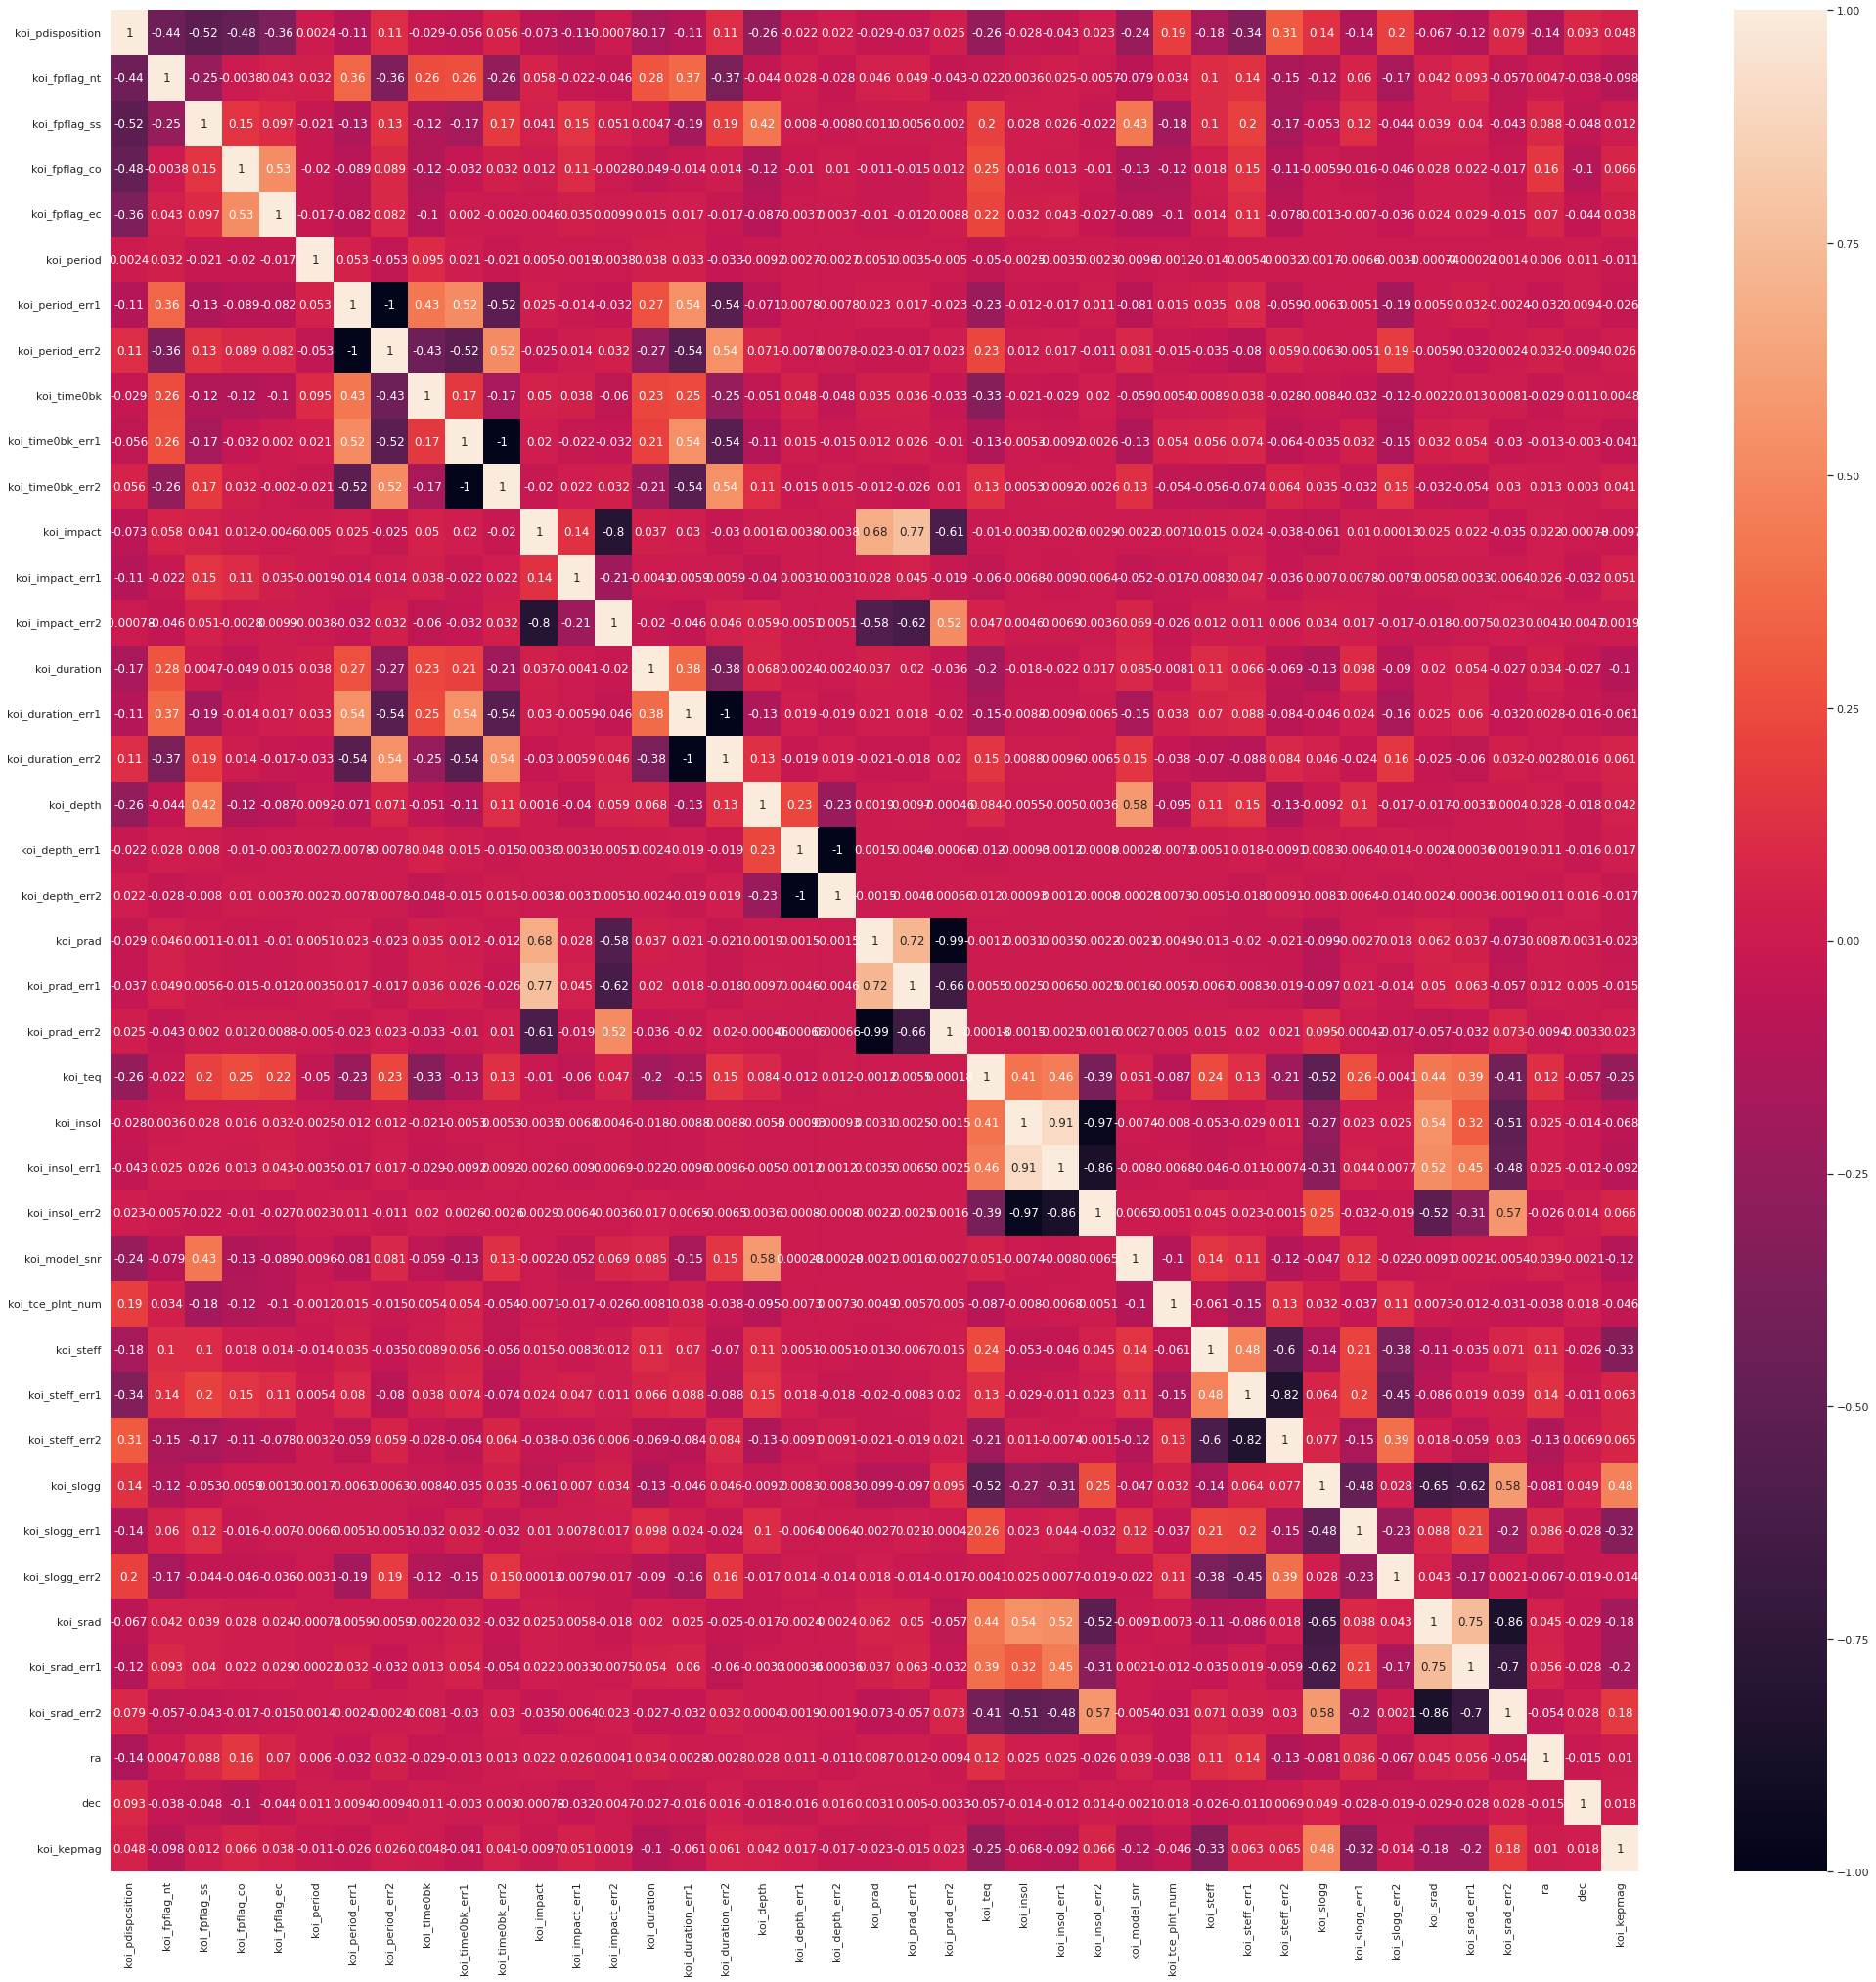

In [ ]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(35,35)})
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

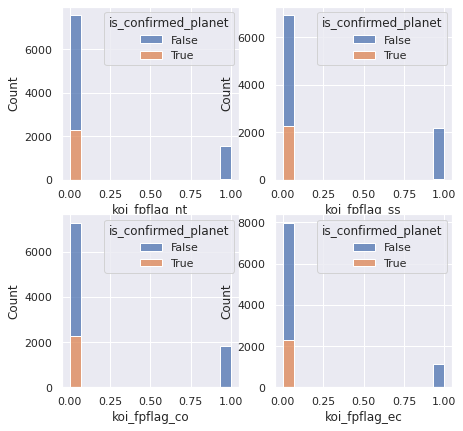

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

import seaborn as sns
sns.set_style("dark")

sns.histplot(data=df, x='koi_fpflag_nt', hue='is_confirmed_planet', multiple="stack",ax=axs[0, 0])
sns.histplot(data=df, x='koi_fpflag_ss', hue='is_confirmed_planet', multiple="stack",ax=axs[0, 1])
sns.histplot(data=df, x='koi_fpflag_ec', hue='is_confirmed_planet', multiple="stack",ax=axs[1, 1])
sns.histplot(data=df, x='koi_fpflag_co', hue='is_confirmed_planet', multiple="stack",ax=axs[1, 0])

(array([4725., 1288.,  579.,  353.,  228.,  159.,  118.,   98.,   98.,
          69.,   53.,   66.,   46.,   39.,   42.,   37.,   32.,   33.,
          40.,   35.,   41.,   29.,   29.,   28.,   25.,   20.,   20.,
          33.,   31.,   14.,   20.,   24.,   24.,   23.,   36.,   81.,
          85.,   48.,   32.,   24.,   16.,   24.,   14.,   17.,   19.,
          11.,   18.,   14.,   23.]),
 array([  0.        ,  10.20408163,  20.40816327,  30.6122449 ,
         40.81632653,  51.02040816,  61.2244898 ,  71.42857143,
         81.63265306,  91.83673469, 102.04081633, 112.24489796,
        122.44897959, 132.65306122, 142.85714286, 153.06122449,
        163.26530612, 173.46938776, 183.67346939, 193.87755102,
        204.08163265, 214.28571429, 224.48979592, 234.69387755,
        244.89795918, 255.10204082, 265.30612245, 275.51020408,
        285.71428571, 295.91836735, 306.12244898, 316.32653061,
        326.53061224, 336.73469388, 346.93877551, 357.14285714,
        367.34693878, 377.55102

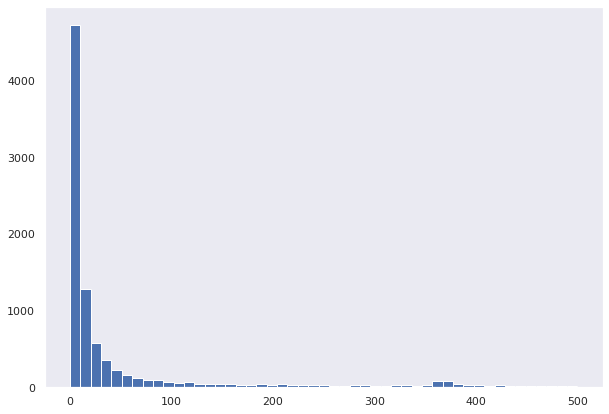

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 500)
ax.hist(df.koi_period, x)

(array([933., 447., 359., 292., 304., 293., 300., 260., 272., 298., 233.,
        251., 264., 274., 240., 275., 266., 308., 262., 259., 230., 277.,
        350., 418., 203.,  75.,  72.,  84., 145., 245., 284., 169.,  28.,
         13.,  10.,   3.,   5.,   3.,   3.,   5.,   4.,   2.,   2.,   2.,
          2.,   3.,   3.,   3.,   3.]),
 array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
        0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
        0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
        0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
        0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
        1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
        1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
        1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
        1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
        1.83673469, 1.87755102, 1.91836735, 1.959183

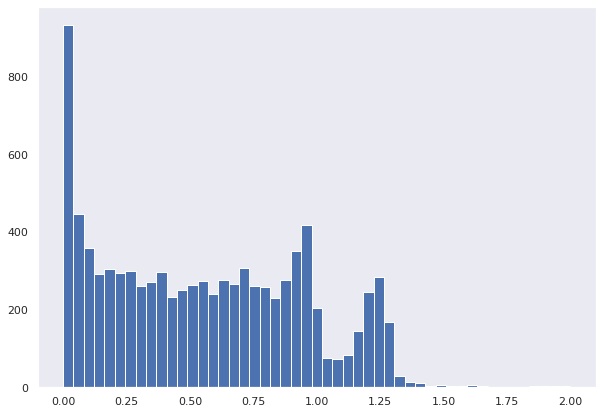

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 2)
ax.hist(df.koi_impact, x)

(array([  36.,  392.,  795., 1043., 1067., 1007.,  813.,  649.,  525.,
         405.,  320.,  270.,  200.,  171.,  144.,  112.,   95.,  112.,
          86.,   69.,   79.,   51.,   56.,   53.,   49.,   45.,   44.,
          35.,   27.,   25.,   23.,   24.,   25.,   17.,   17.,   18.,
          15.,   13.,   22.,   14.,    9.,    5.,    8.,    4.,    5.,
           6.,   10.,    8.,    2.]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25

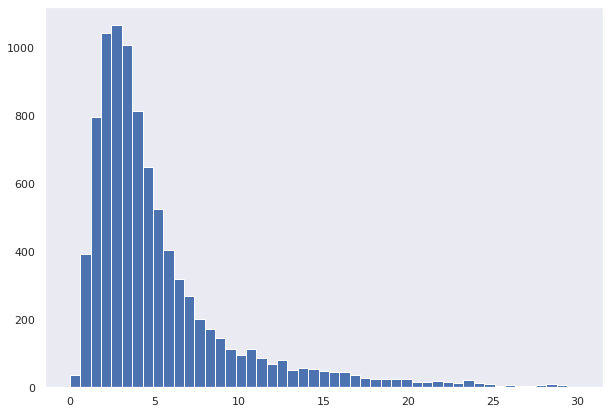

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 30)
ax.hist(df.koi_duration, x)

(array([2018., 1590.,  974.,  674.,  454.,  356.,  271.,  213.,  127.,
         116.,   88.,   73.,   49.,   40.,   57.,   35.,   38.,   25.,
          21.,   22.,   22.,   27.,   16.,   13.,   11.,   16.,   10.,
           9.,   10.,   12.,   14.,    9.,   14.,   16.,   14.,   17.,
           7.,    9.,    9.,   10.,   11.,   11.,    9.,   12.,    5.,
           7.,    6.,    8.,   12.]),
 array([   0.        ,  142.85714286,  285.71428571,  428.57142857,
         571.42857143,  714.28571429,  857.14285714, 1000.        ,
        1142.85714286, 1285.71428571, 1428.57142857, 1571.42857143,
        1714.28571429, 1857.14285714, 2000.        , 2142.85714286,
        2285.71428571, 2428.57142857, 2571.42857143, 2714.28571429,
        2857.14285714, 3000.        , 3142.85714286, 3285.71428571,
        3428.57142857, 3571.42857143, 3714.28571429, 3857.14285714,
        4000.        , 4142.85714286, 4285.71428571, 4428.57142857,
        4571.42857143, 4714.28571429, 4857.14285714, 5000.     

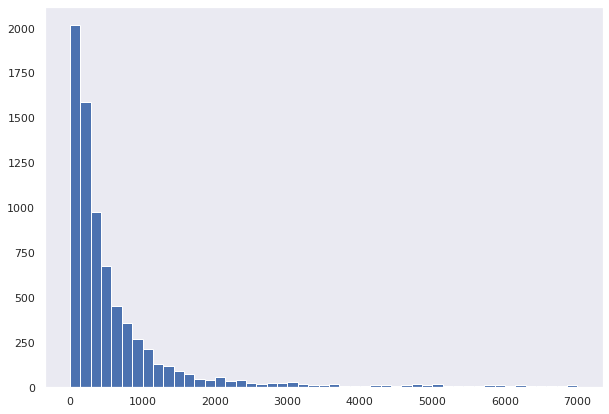

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 7000)
ax.hist(df.koi_depth, x)

(array([3872., 2075.,  336.,  180.,  115.,  116.,   94.,   94.,   74.,
          80.,   93.,   97.,   96.,   81.,  103.,   69.,   59.,   68.,
          75.,   77.,   58.,   61.,   53.,   46.,   71.,   62.,   38.,
          43.,   36.,   37.,   38.,   28.,   31.,   32.,   21.,   28.,
          22.,   22.,   24.,   16.,   17.,    8.,   14.,   18.,   22.,
          19.,    8.,   16.,    5.]),
 array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
          8.16326531,  10.20408163,  12.24489796,  14.28571429,
         16.32653061,  18.36734694,  20.40816327,  22.44897959,
         24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
         32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
         40.81632653,  42.85714286,  44.89795918,  46.93877551,
         48.97959184,  51.02040816,  53.06122449,  55.10204082,
         57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
         65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
         73.46938776,  75.51020

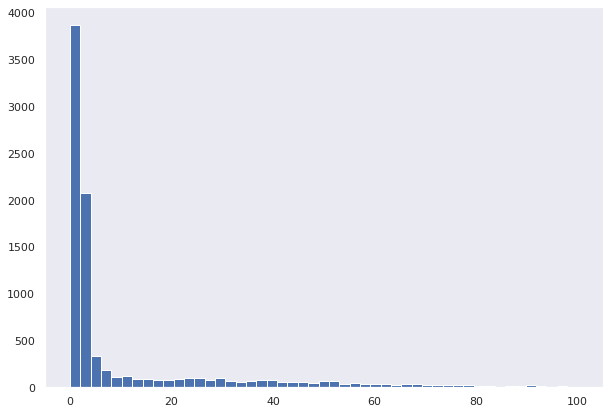

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 100)
ax.hist(df.koi_prad, x)

(array([  9., 375., 817., 704., 882., 841., 814., 697., 654., 531., 412.,
        357., 299., 291., 219., 186., 179., 146., 104.,  89.,  77.,  55.,
         61.,  38.,  37.,  30.,  34.,  22.,  15.,  18.,  13.,  10.,   4.,
          6.,  10.,   5.,   7.,   2.,   3.,   4.,   7.,   7.,   5.,   3.,
          1.,   1.,   2.,   0.,   1.]),
 array([   0.        ,  122.44897959,  244.89795918,  367.34693878,
         489.79591837,  612.24489796,  734.69387755,  857.14285714,
         979.59183673, 1102.04081633, 1224.48979592, 1346.93877551,
        1469.3877551 , 1591.83673469, 1714.28571429, 1836.73469388,
        1959.18367347, 2081.63265306, 2204.08163265, 2326.53061224,
        2448.97959184, 2571.42857143, 2693.87755102, 2816.32653061,
        2938.7755102 , 3061.2244898 , 3183.67346939, 3306.12244898,
        3428.57142857, 3551.02040816, 3673.46938776, 3795.91836735,
        3918.36734694, 4040.81632653, 4163.26530612, 4285.71428571,
        4408.16326531, 4530.6122449 , 4653.06122449,

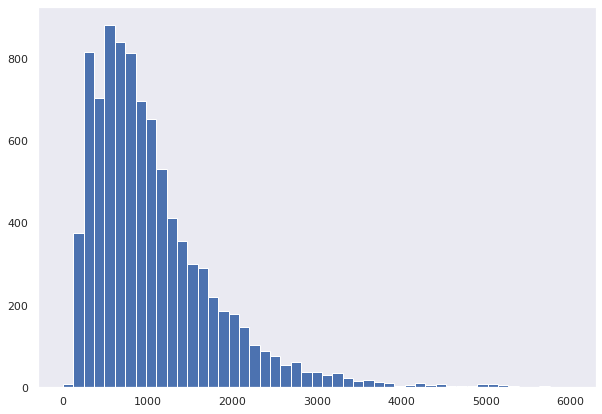

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 6000)
ax.hist(df.koi_teq, x)

(array([4168.,  891.,  583.,  358.,  281.,  209.,  165.,  140.,  124.,
          99.,   95.,   89.,   55.,   81.,   60.,   50.,   58.,   71.,
          56.,   50.,   40.,   37.,   28.,   41.,   31.,   33.,   36.,
          26.,   25.,   23.,   26.,   18.,   27.,   11.,   29.,   22.,
          25.,   25.,   15.,   15.,   17.,   13.,   10.,   18.,   16.,
          22.,   13.,   16.,   12.]),
 array([   0.        ,  102.04081633,  204.08163265,  306.12244898,
         408.16326531,  510.20408163,  612.24489796,  714.28571429,
         816.32653061,  918.36734694, 1020.40816327, 1122.44897959,
        1224.48979592, 1326.53061224, 1428.57142857, 1530.6122449 ,
        1632.65306122, 1734.69387755, 1836.73469388, 1938.7755102 ,
        2040.81632653, 2142.85714286, 2244.89795918, 2346.93877551,
        2448.97959184, 2551.02040816, 2653.06122449, 2755.10204082,
        2857.14285714, 2959.18367347, 3061.2244898 , 3163.26530612,
        3265.30612245, 3367.34693878, 3469.3877551 , 3571.42857

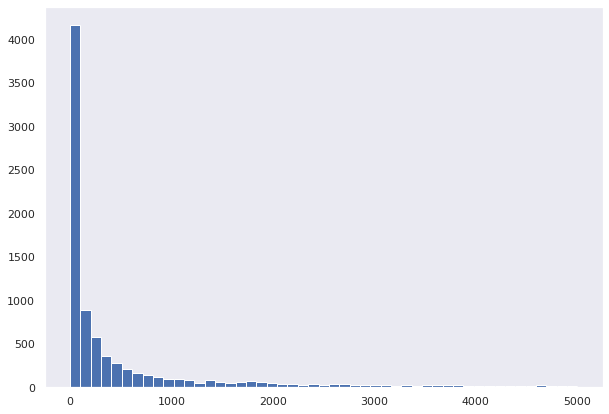

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 5000)
ax.hist(df.koi_insol, x)

(array([2908., 2211.,  864.,  475.,  274.,  191.,  153.,  117.,  112.,
          70.,   62.,   63.,   59.,   39.,   40.,   38.,   34.,   38.,
          30.,   31.,   37.,   35.,   19.,   17.,   20.,   19.,   15.,
          21.,    7.,   19.,   17.,   24.,   14.,   13.,    9.,   15.,
          11.,   21.,   15.,   12.,   13.,    9.,   10.,   13.,   13.,
           9.,   13.,   11.,    8.]),
 array([  0.        ,  14.28571429,  28.57142857,  42.85714286,
         57.14285714,  71.42857143,  85.71428571, 100.        ,
        114.28571429, 128.57142857, 142.85714286, 157.14285714,
        171.42857143, 185.71428571, 200.        , 214.28571429,
        228.57142857, 242.85714286, 257.14285714, 271.42857143,
        285.71428571, 300.        , 314.28571429, 328.57142857,
        342.85714286, 357.14285714, 371.42857143, 385.71428571,
        400.        , 414.28571429, 428.57142857, 442.85714286,
        457.14285714, 471.42857143, 485.71428571, 500.        ,
        514.28571429, 528.57142

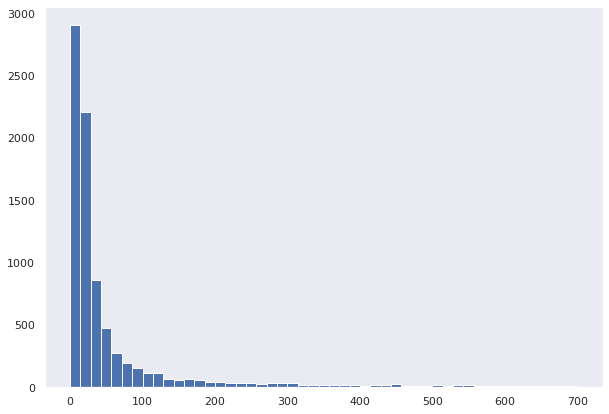

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 700)
ax.hist(df.koi_model_snr, x)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 1.400e+01, 2.700e+01, 3.800e+01, 1.040e+02, 1.000e+02,
        5.100e+01, 9.100e+01, 1.050e+02, 1.320e+02, 1.340e+02, 3.160e+02,
        4.660e+02, 5.280e+02, 6.100e+02, 8.330e+02, 9.160e+02, 1.133e+03,
        1.055e+03, 9.060e+02, 5.890e+02, 3.380e+02, 1.790e+02, 1.000e+02,
        6.700e+01, 4.700e+01, 3.900e+01, 2.000e+01, 2.800e+01, 1.900e+01,
        1.400e+01, 1.800e+01, 1.000e+01, 7.000e+00, 8.000e+00, 1.100e+01,
        8.000e+00, 6.000e+00, 5.000e+00, 7.000e+00, 6.000e+00, 1.000e+00,
        3.000e+00]),
 array([ 2000.        ,  2163.26530612,  2326.53061224,  2489.79591837,
         2653.06122449,  2816.32653061,  2979.59183673,  3142.85714286,
         3306.12244898,  3469.3877551 ,  3632.65306122,  3795.91836735,
         3959.18367347,  4122.44897959,  4285.71428571,  4448.97959184,
         4612.24489796,  4775.51020408,  4938.7755102 ,  5102.04081633,
         5265.30612245,  54

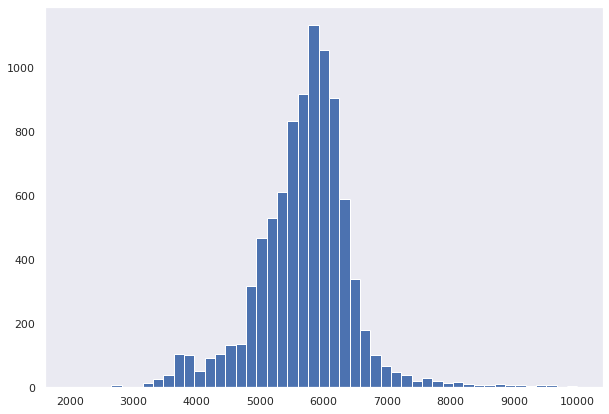

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(2000, 10000)
ax.hist(df.koi_steff, x)

(array([2.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.100e+01, 2.200e+01,
        1.300e+01, 2.100e+01, 1.300e+01, 1.900e+01, 1.500e+01, 2.600e+01,
        3.200e+01, 2.600e+01, 2.600e+01, 2.800e+01, 2.800e+01, 4.000e+01,
        5.100e+01, 7.600e+01, 1.060e+02, 1.420e+02, 1.840e+02, 1.890e+02,
        2.790e+02, 3.560e+02, 4.470e+02, 5.330e+02, 7.130e+02, 1.324e+03,
        1.795e+03, 1.652e+03, 5.270e+02, 2.430e+02, 6.200e+01, 3.000e+01,
        1.000e+01, 6.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([2.        , 2.08163265, 2.16326531, 2.24489796, 2.32653061,
        2.40816327, 2.48979592, 2.57142857, 2.65306122, 2.73469388,
        2.81632653, 2.89795918, 2.97959184, 3.06122449, 3.14285714,
        3.2244898 , 3.30612245, 3.3877551 , 3.46938776, 3.55102041,
        3.63265306, 3.71428571, 3.79591837, 3.87755102, 3.95918367,
        4.04081633, 4.12244898, 4.20408163, 4.2

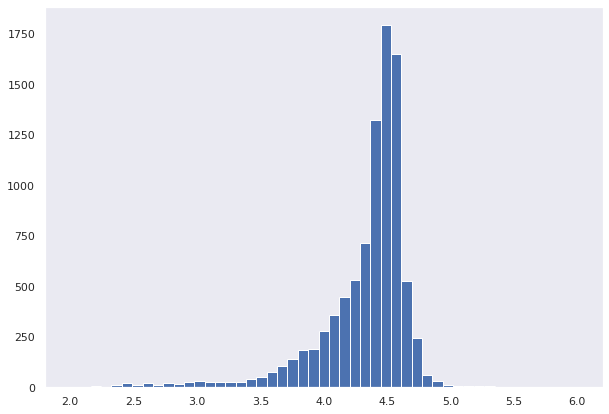

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(2, 6)
ax.hist(df.koi_slogg, x)

(array([   7.,   14.,   23.,   91.,  351.,  656., 1545., 1618., 1392.,
         715.,  444.,  359.,  247.,  246.,  159.,  130.,  115.,   98.,
          81.,   65.,   57.,   55.,   43.,   40.,   40.,   35.,   36.,
          28.,   22.,   16.,   13.,   14.,   11.,    9.,    9.,   18.,
          12.,    4.,    7.,   10.,    8.,    7.,    4.,    6.,    2.,
           5.,    2.,    4.,    5.]),
 array([0.        , 0.12244898, 0.24489796, 0.36734694, 0.48979592,
        0.6122449 , 0.73469388, 0.85714286, 0.97959184, 1.10204082,
        1.2244898 , 1.34693878, 1.46938776, 1.59183673, 1.71428571,
        1.83673469, 1.95918367, 2.08163265, 2.20408163, 2.32653061,
        2.44897959, 2.57142857, 2.69387755, 2.81632653, 2.93877551,
        3.06122449, 3.18367347, 3.30612245, 3.42857143, 3.55102041,
        3.67346939, 3.79591837, 3.91836735, 4.04081633, 4.16326531,
        4.28571429, 4.40816327, 4.53061224, 4.65306122, 4.7755102 ,
        4.89795918, 5.02040816, 5.14285714, 5.26530612, 5.38775

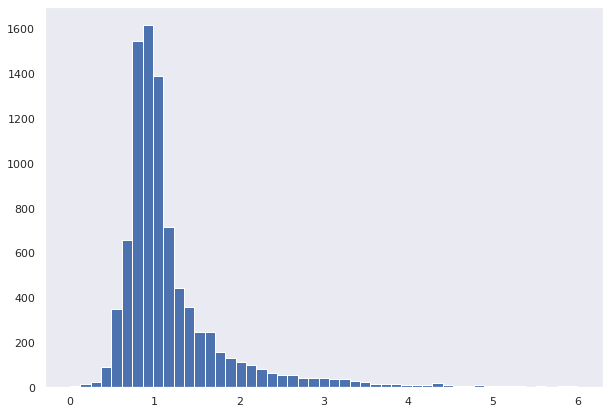

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(0, 6)
ax.hist(df.koi_srad, x)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  23., 105., 168., 278., 332., 398., 455., 472., 505.,
        725., 837., 749., 678., 756., 709., 677., 585., 431., 165.,  62.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([265.        , 266.12244898, 267.24489796, 268.36734694,
        269.48979592, 270.6122449 , 271.73469388, 272.85714286,
        273.97959184, 275.10204082, 276.2244898 , 277.34693878,
        278.46938776, 279.59183673, 280.71428571, 281.83673469,
        282.95918367, 284.08163265, 285.20408163, 286.32653061,
        287.44897959, 288.57142857, 289.69387755, 290.81632653,
        291.93877551, 293.06122449, 294.18367347, 295.30612245,
        296.42857143, 297.55102041, 298.67346939, 299.79591837,
        300.91836735, 302.04081633, 303.16326531, 304.28571429,
        305.40816327, 306.53061224, 307.65306122, 308.7755102 ,
        309.89795918, 31

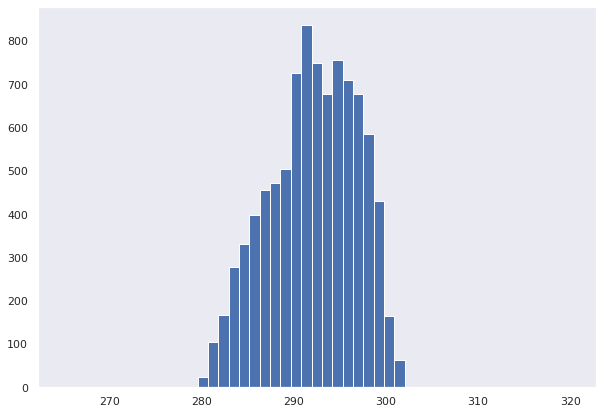

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(265, 320)
ax.hist(df.ra, x)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
         39., 198., 368., 406., 366., 508., 570., 514., 513., 520., 386.,
        478., 524., 431., 392., 458., 526., 420., 362., 280., 269., 219.,
        189., 122.,  40.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
        33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
        36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
        39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
        42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
        45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
        48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
        51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
        54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       

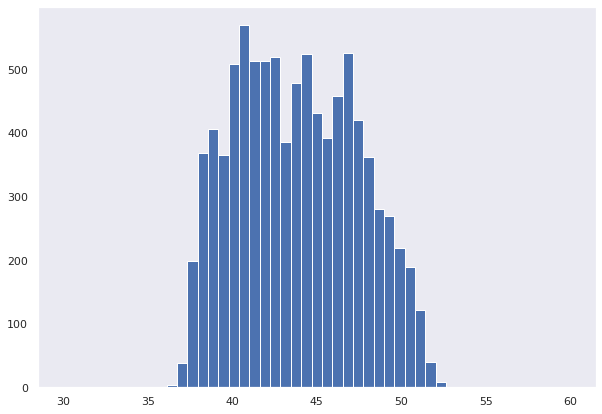

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(30, 60)
ax.hist(df.dec, x)

(array([  0.,   1.,   2.,   5.,   2.,   2.,   9.,   3.,  12.,   7.,  13.,
         26.,  22.,  37.,  49.,  65.,  98., 131., 128., 172., 236., 260.,
        369., 411., 562., 642., 557., 479., 639., 766., 787., 888., 813.,
        698.,  45.,  40.,  33.,  26.,  15.,  23.,  12.,   7.,   4.,   4.,
          2.,   2.,   2.,   1.,   0.]),
 array([ 7.        ,  7.26530612,  7.53061224,  7.79591837,  8.06122449,
         8.32653061,  8.59183673,  8.85714286,  9.12244898,  9.3877551 ,
         9.65306122,  9.91836735, 10.18367347, 10.44897959, 10.71428571,
        10.97959184, 11.24489796, 11.51020408, 11.7755102 , 12.04081633,
        12.30612245, 12.57142857, 12.83673469, 13.10204082, 13.36734694,
        13.63265306, 13.89795918, 14.16326531, 14.42857143, 14.69387755,
        14.95918367, 15.2244898 , 15.48979592, 15.75510204, 16.02040816,
        16.28571429, 16.55102041, 16.81632653, 17.08163265, 17.34693878,
        17.6122449 , 17.87755102, 18.14285714, 18.40816327, 18.67346939,
       

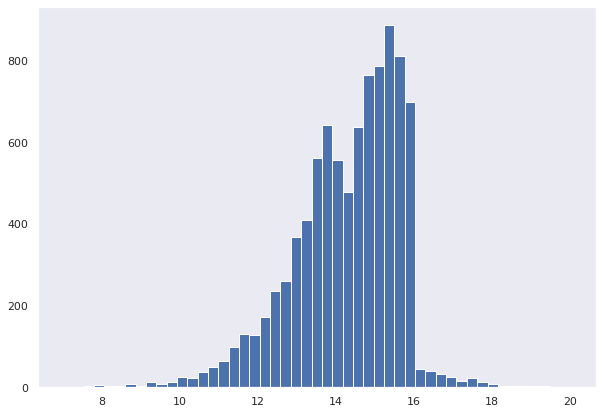

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
x = np.linspace(7, 20)
ax.hist(df.koi_kepmag, x)

In [ ]:
df_base_features = df[['koi_disposition', 'koi_period', 'koi_duration', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_steff', 'koi_srad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_slogg', 'ra', 'dec', 'koi_kepmag']]

In [ ]:
df_base_features.columns

Index(['koi_disposition', 'koi_period', 'koi_duration', 'koi_impact',
       'koi_depth', 'koi_prad', 'koi_steff', 'koi_srad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_slogg', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

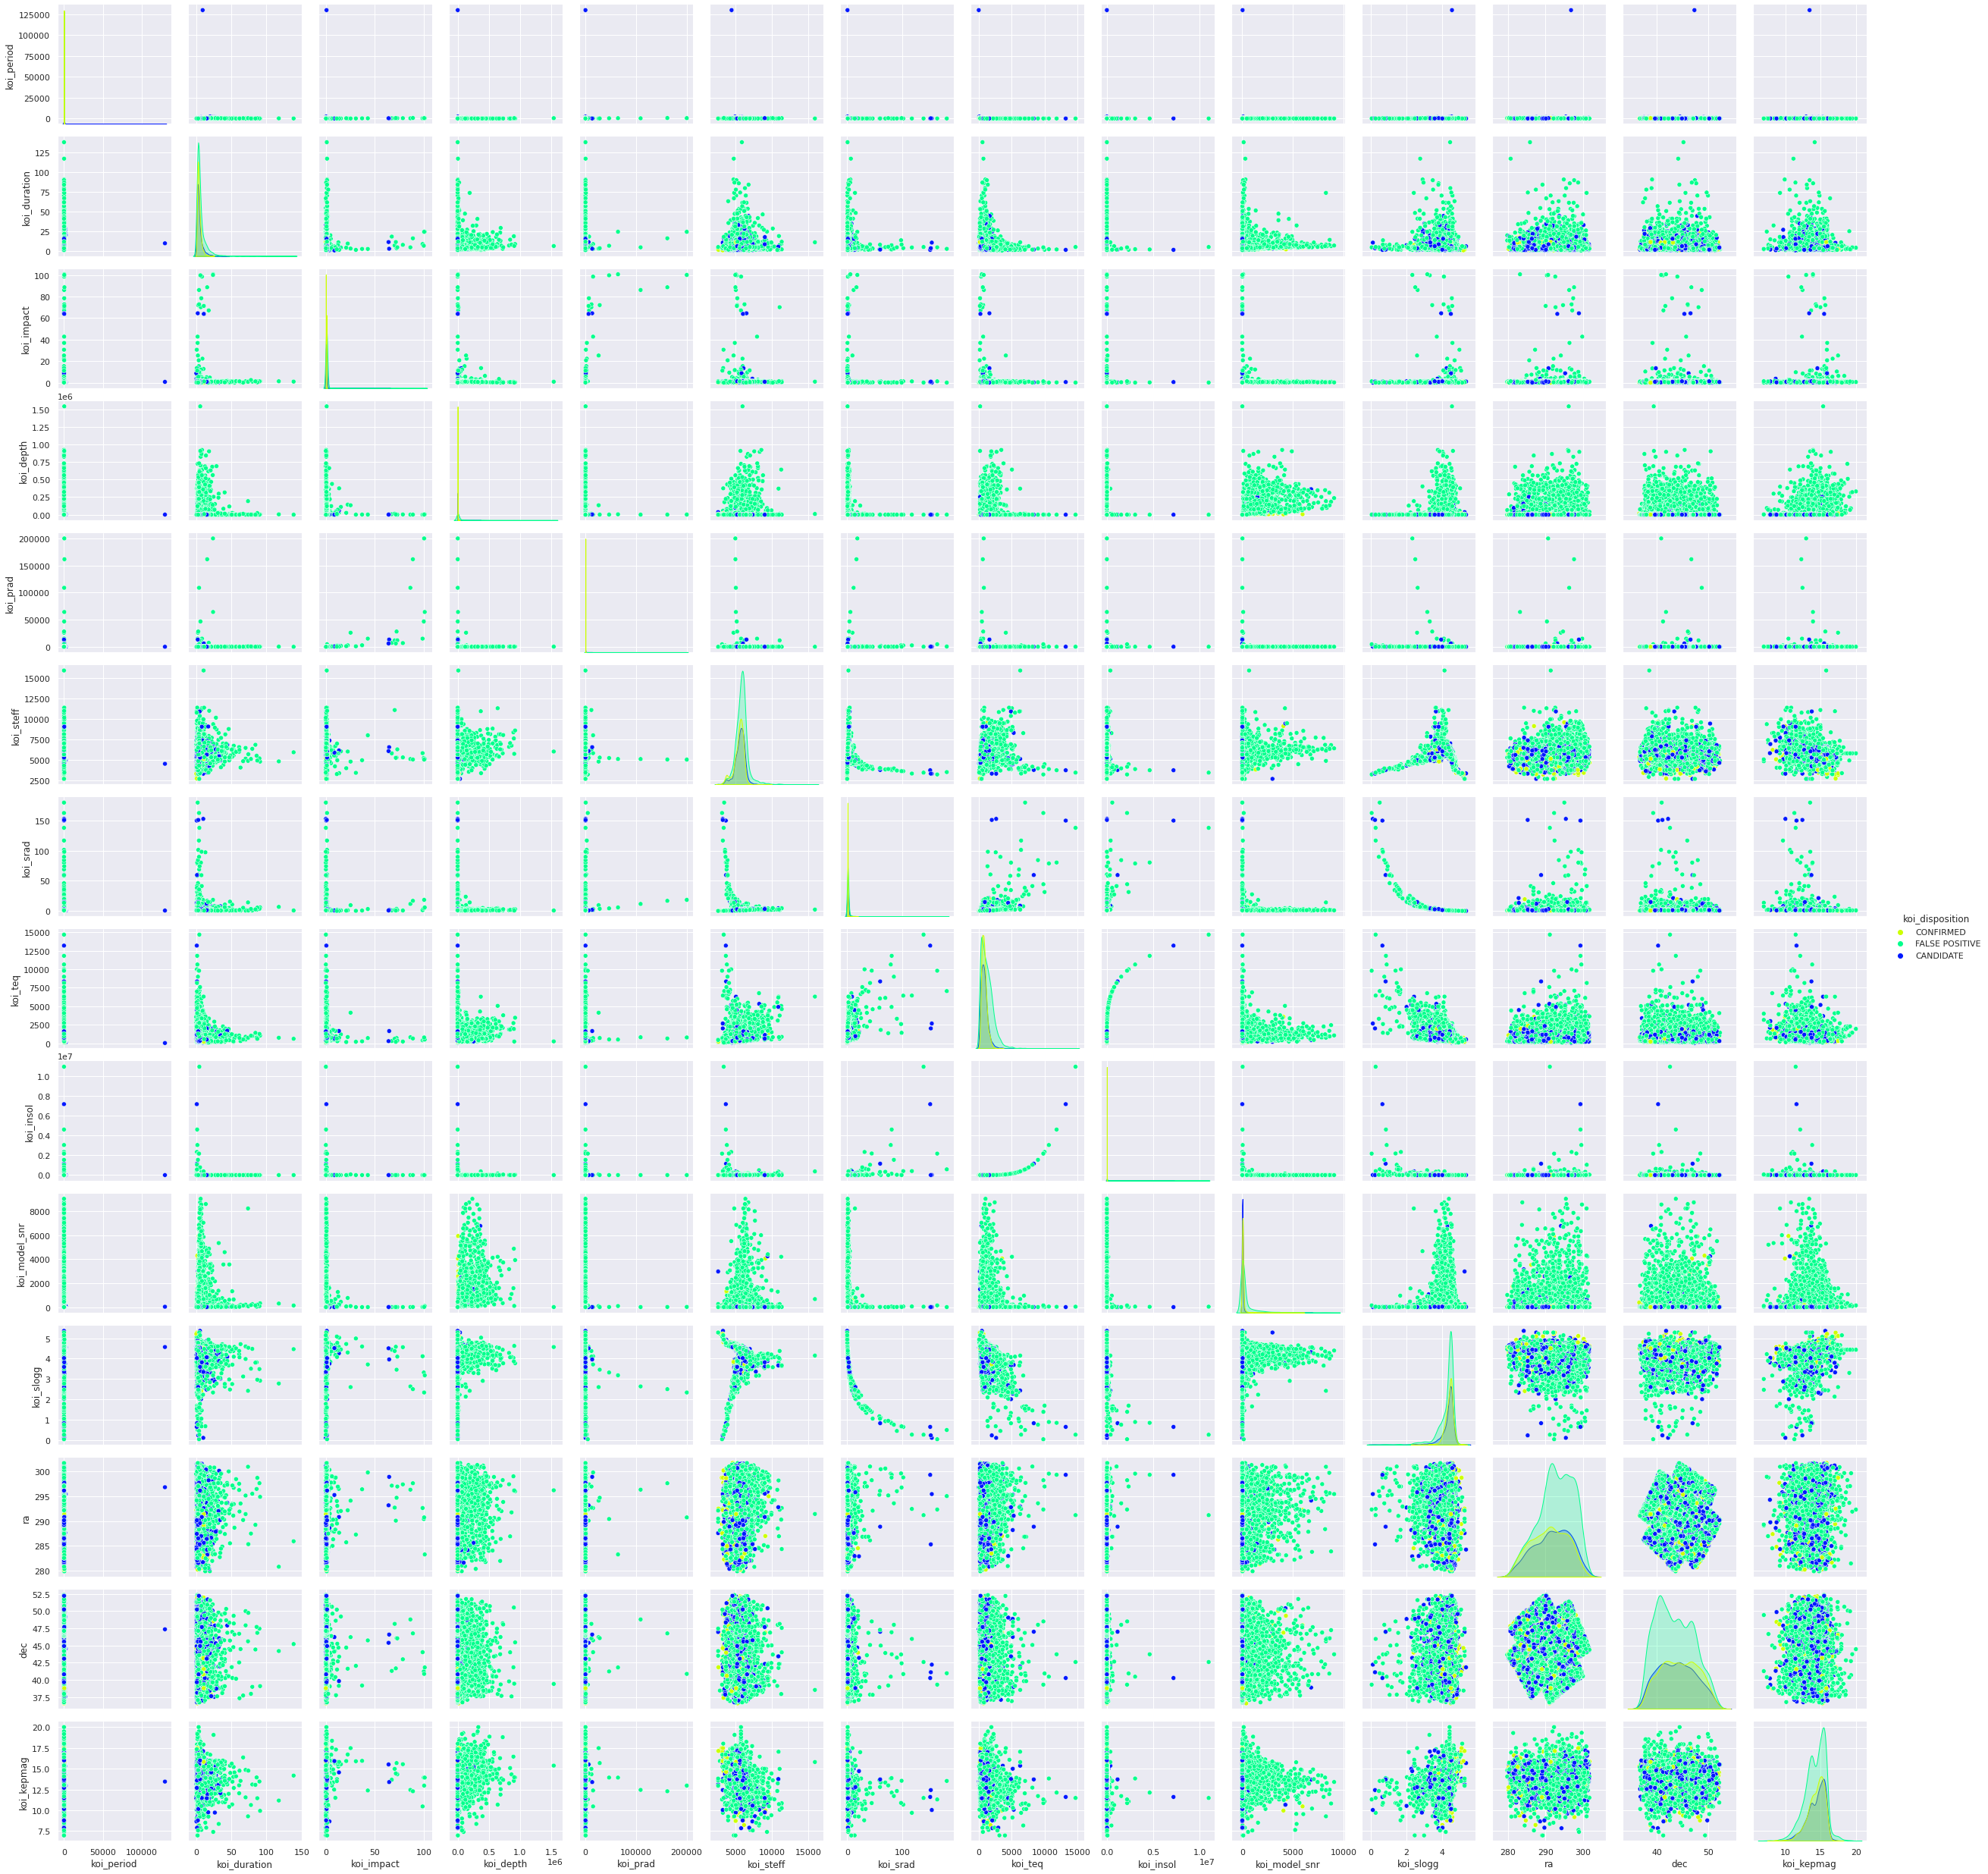

In [ ]:
sns.pairplot(df_base_features, hue = 'koi_disposition', palette='gist_rainbow')
plt.show()

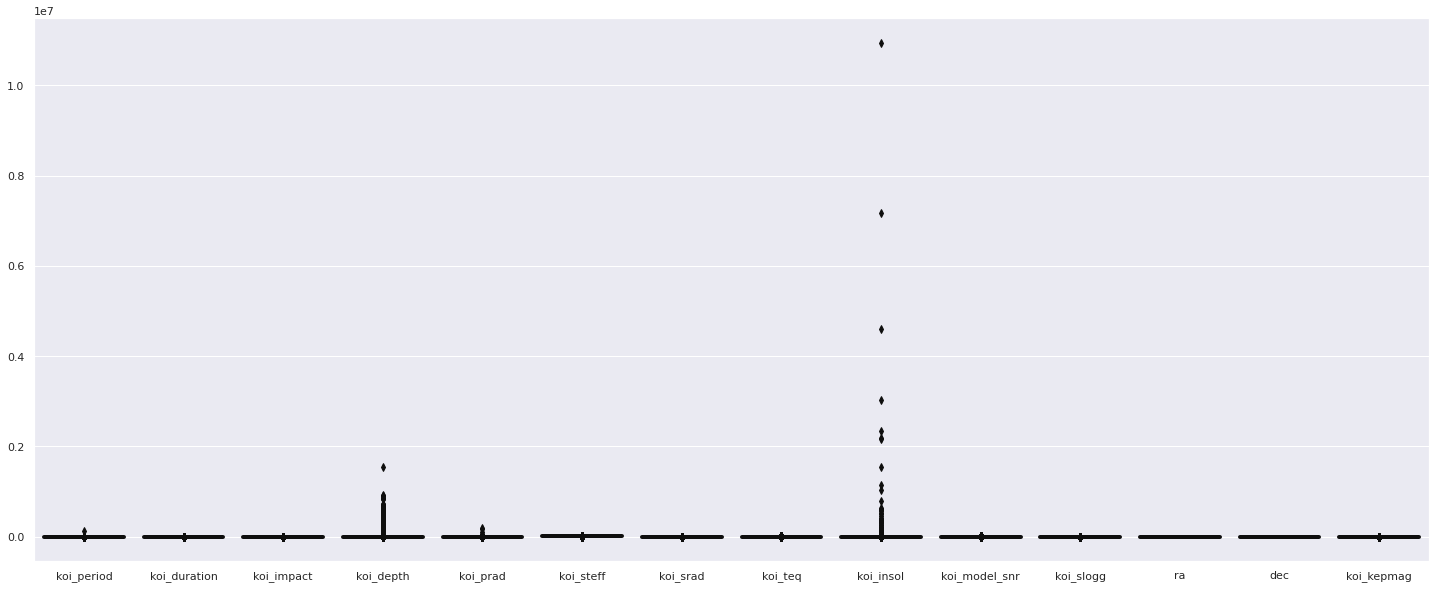

In [ ]:
sns.set(rc = {'figure.figsize':(25, 10)})
sns.boxplot(data=df_base_features, palette='mako', linewidth=4)

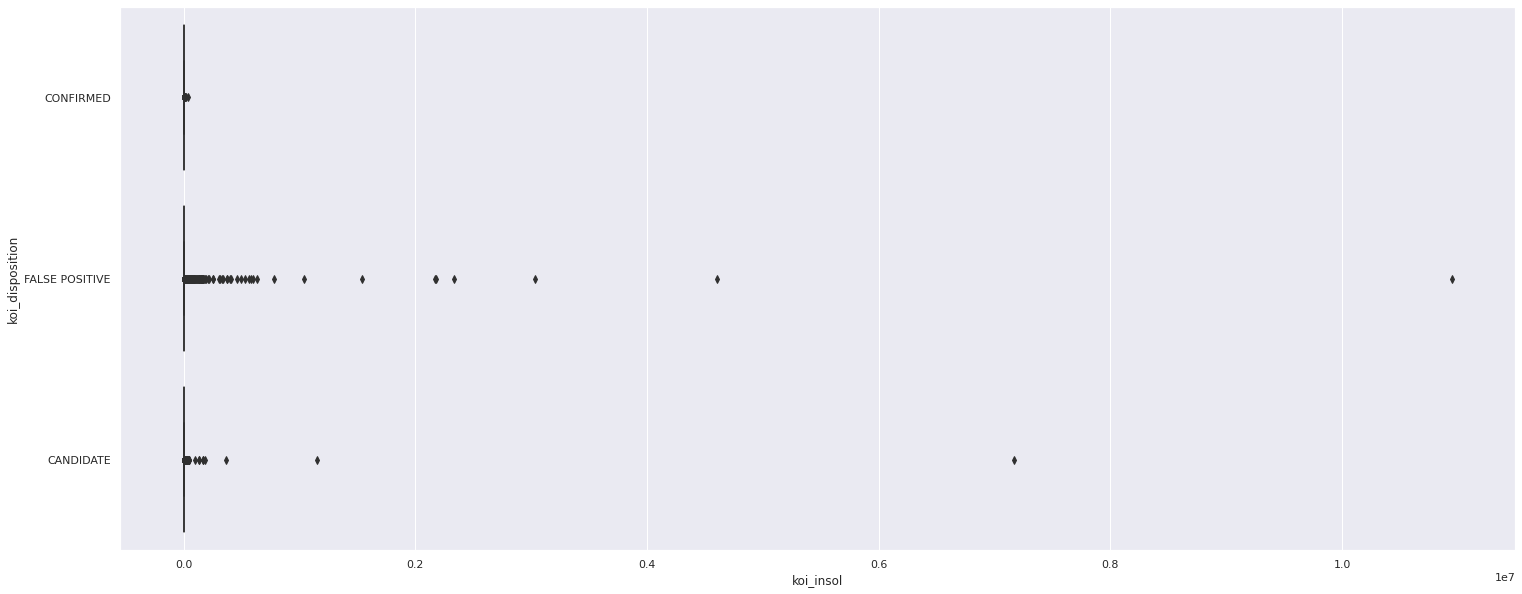

In [ ]:
sns.boxplot(x=df_base_features.koi_insol, y = df_base_features.koi_disposition, palette='mako')

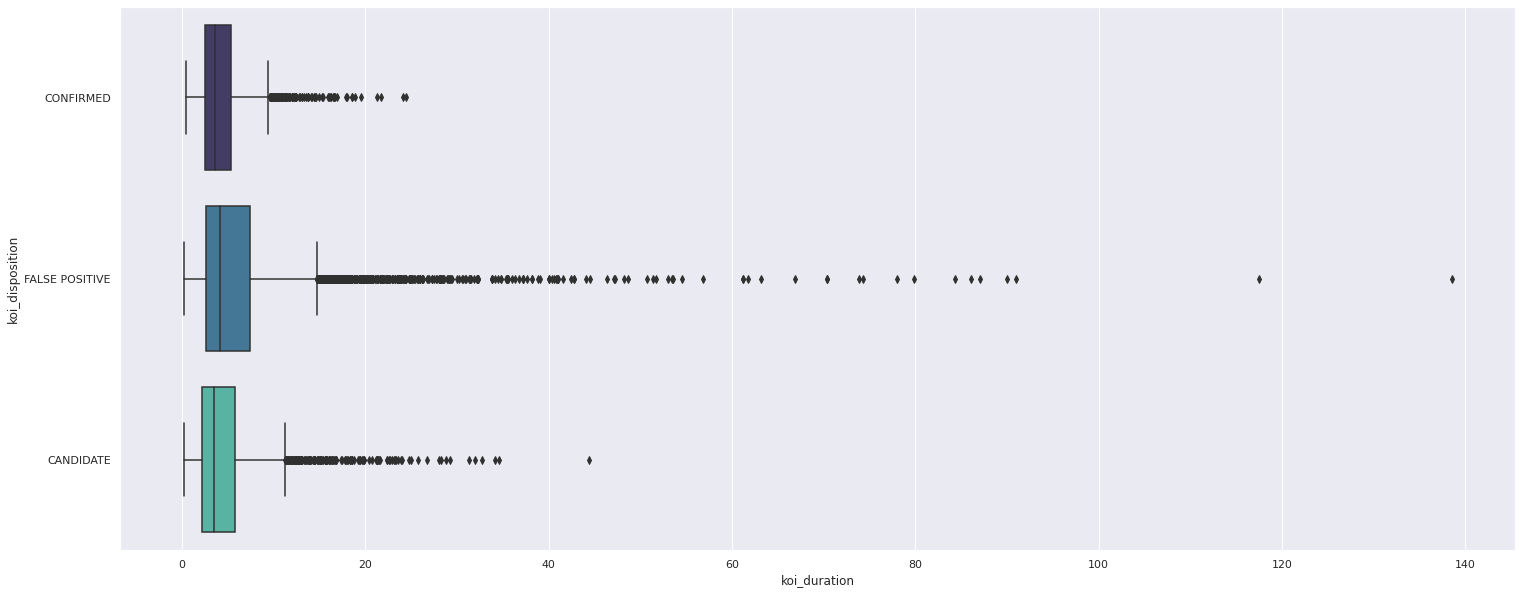

In [ ]:
sns.boxplot(x=df_base_features.koi_duration, y = df_base_features.koi_disposition, palette='mako')

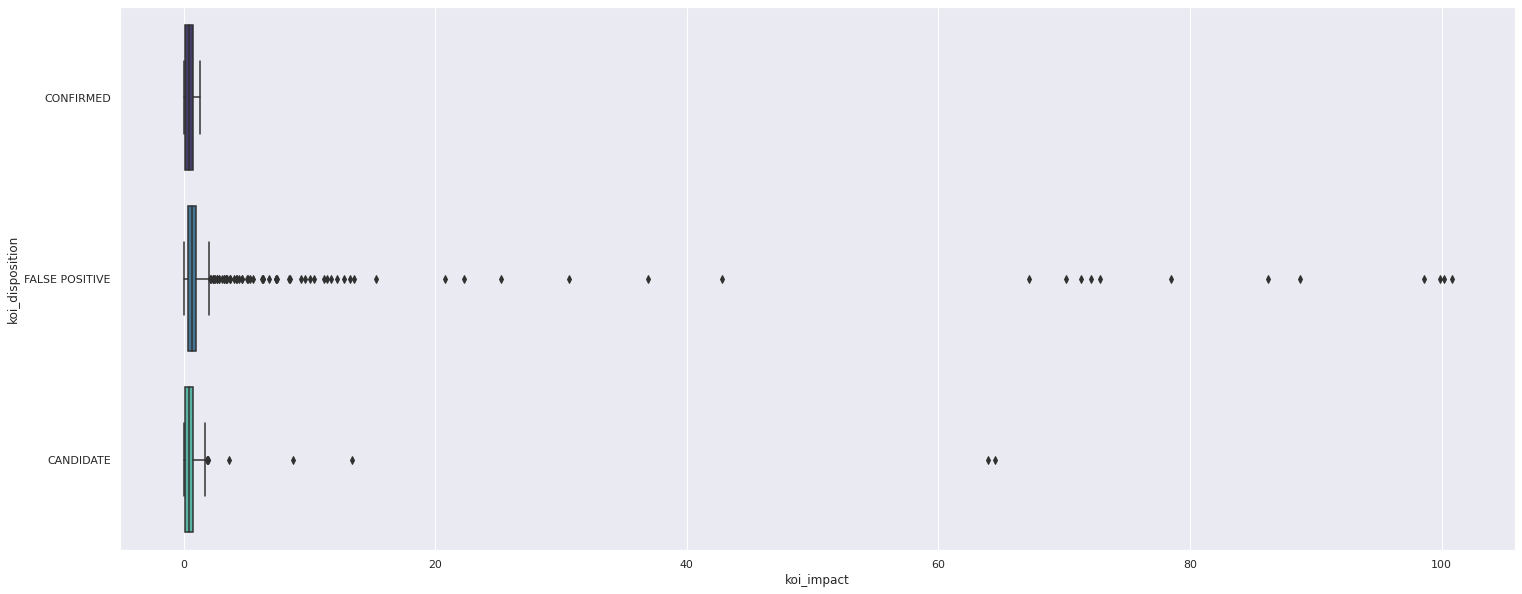

In [ ]:
sns.boxplot(x=df_base_features.koi_impact, y = df_base_features.koi_disposition, palette='mako')

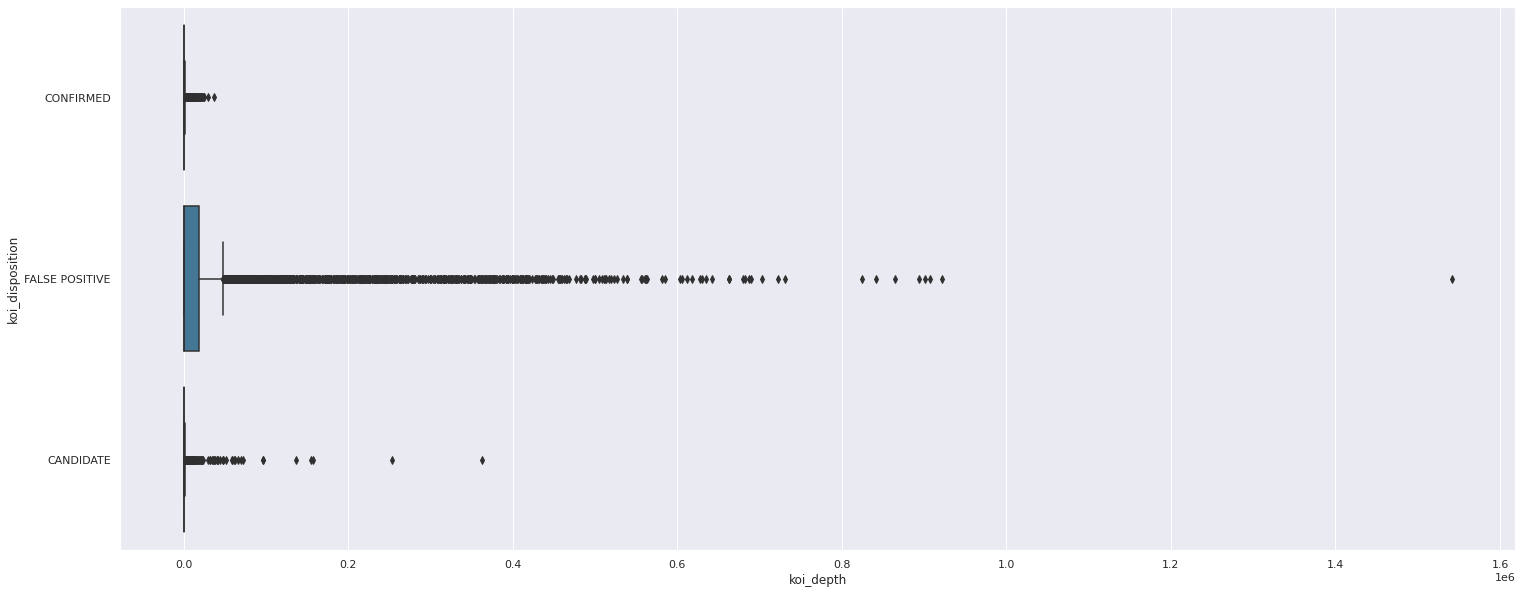

In [ ]:
sns.boxplot(x=df_base_features.koi_depth, y = df_base_features.koi_disposition, palette='mako')

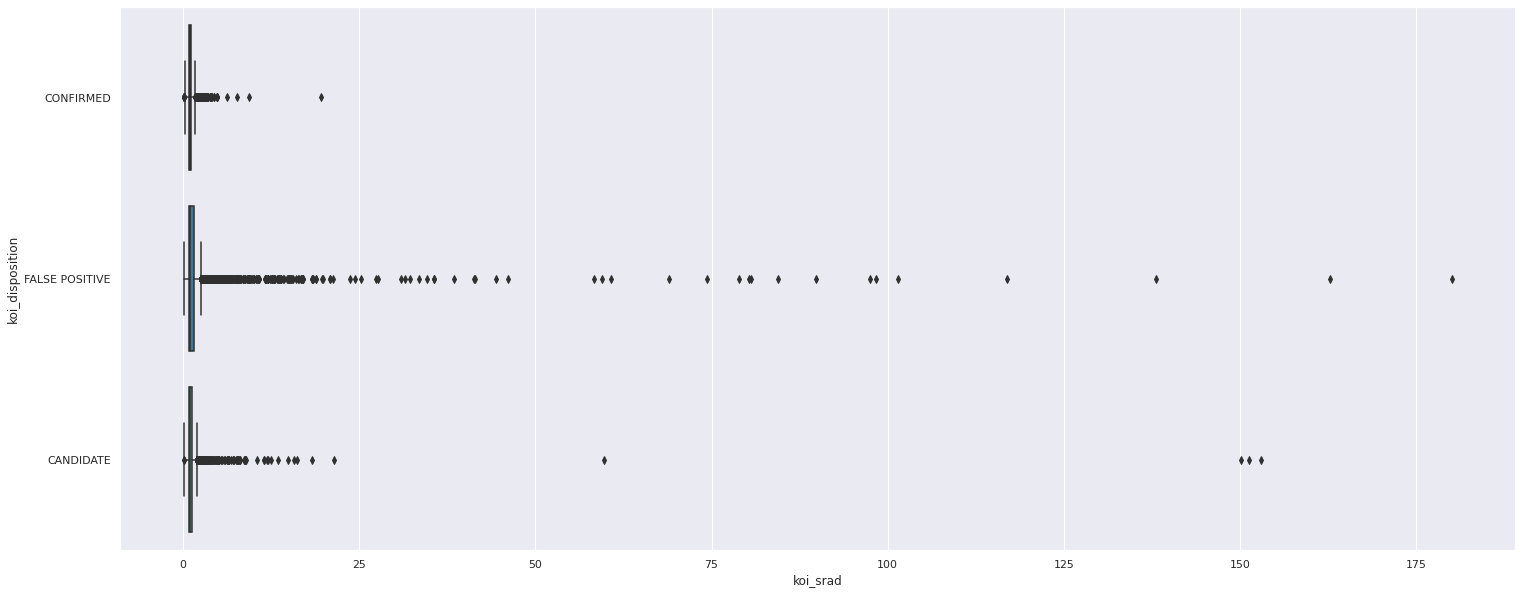

In [ ]:
sns.boxplot(x=df_base_features.koi_srad, y = df_base_features.koi_disposition, palette='mako')

In [ ]:
ax = sns.boxplot( data=([non_dup_word_share,dup_word_share]))
# ax = sns.stripplot( data=([non_dup_word_share,dup_word_share]), color=".20")
plt.xlabel("Is Duplicate")
plt.ylabel("Word_Share")

In [ ]:
data_y = np.array(dataframe.loc[:,dataframe.columns == "koi_disposition"])
data_x = np.array(dataframe.loc[:,dataframe.columns != "koi_disposition"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.20,random_state = 56,stratify=data_y)
scaler  =  StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
train_x_pca = pca.fit_transform(train_x_scaled)
print(pca.explained_variance_ratio_)


[1.25600460e-01 1.22621075e-01 9.25640423e-02 8.47640522e-02
 5.32032271e-02 4.88488586e-02 4.24759047e-02 4.07218119e-02
 3.03308273e-02 2.84608835e-02 2.61586485e-02 2.46449195e-02
 2.43579261e-02 2.36055939e-02 2.27483396e-02 2.24970172e-02
 1.98842317e-02 1.89610171e-02 1.71703033e-02 1.50998364e-02
 1.48384076e-02 1.35312982e-02 1.31999583e-02 1.14321565e-02
 1.06111590e-02 9.29425686e-03 8.30138039e-03 7.98252772e-03
 6.14736429e-03 5.55597279e-03 3.73914212e-03 3.40683974e-03
 2.67841151e-03 2.20698901e-03 1.76572800e-03 4.20202024e-04
 1.69230336e-04 2.47703232e-32 2.34240051e-33 6.97954719e-34
 7.35559051e-35]
(7288, 41)


In [88]:
n_comp = 0
for i in range(len(pca.explained_variance_ratio_)):
  if(pca.explained_variance_ratio_[i] > 0.01):
    n_comp+=1

In [87]:
pca = PCA(n_components=n_comp)
train_x_pca = pca.fit_transform(train_x_scaled)
test_x_pca = pca.transform(test_x)

[0.12560046 0.12262107 0.09256404 0.08476405 0.05320323 0.04884886
 0.0424759  0.04072181 0.03033083 0.02846088 0.02615865 0.02464492
 0.02435793 0.02360559 0.02274834 0.02249702 0.01988423 0.01896102
 0.0171703  0.01509984 0.01483841 0.0135313  0.01319996 0.01143216
 0.01061116]
